# Capstone Project
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**To determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

In [51]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Fandango Displayed Scores versus True User Ratings

First exploring the Fandango ratings to see if our analysis agrees with the article's conclusion.

In [52]:
fandango = pd.read_csv("fandango_scrape.csv")
fandango.head()

FILM  STARS  RATING  VOTES
0  Fifty Shades of Grey (2015)    4.0     3.9  34846
1        Jurassic World (2015)    4.5     4.5  34390
2       American Sniper (2015)    5.0     4.8  34085
3             Furious 7 (2015)    5.0     4.8  33538
4            Inside Out (2015)    4.5     4.5  15749

In [53]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [54]:
fandango.describe()

STARS      RATING         VOTES
count  504.000000  504.000000    504.000000
mean     3.558532    3.375794   1147.863095
std      1.563133    1.491223   3830.583136
min      0.000000    0.000000      0.000000
25%      3.500000    3.100000      3.000000
50%      4.000000    3.800000     18.500000
75%      4.500000    4.300000    189.750000
max      5.000000    5.000000  34846.000000

**Exploring the relationship between popularity of a film and its rating. Below is a scatterplot showing the relationship between rating and votes.**

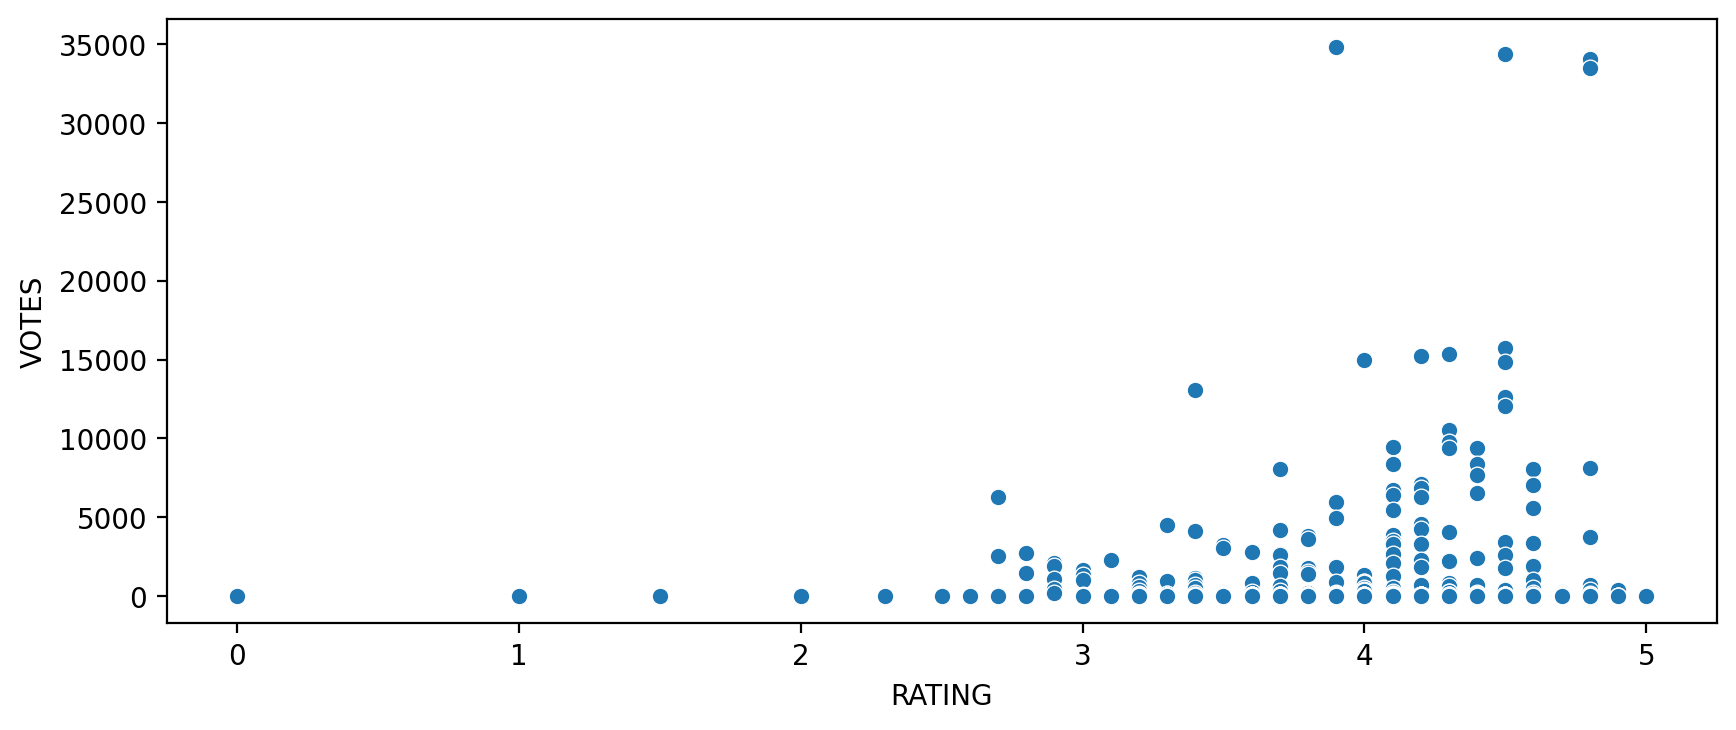

In [55]:
# CODE HERE
plt.figure(figsize=(10,4), dpi=200)

sns.scatterplot(data=fandango, x='RATING', y='VOTES')

plt.show()

**Calculating the correlation between the columns:**

In [56]:
fandango.corr()

STARS    RATING     VOTES
STARS   1.000000  0.994696  0.164218
RATING  0.994696  1.000000  0.163764
VOTES   0.164218  0.163764  1.000000

**Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Creating a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [57]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split(' ')[-1][1:-1])
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

**Displaying how many movies are in the Fandango DataFrame per year.**

In [58]:
#CODE HERE
fandango['YEAR'].value_counts()

2015    478
2014     23
1964      1
2016      1
2012      1
Name: YEAR, dtype: int64

**Count of movies per year with a count plot:**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

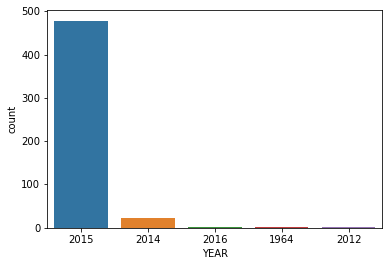

In [59]:
sns.countplot(data=fandango, x='YEAR')

**The 10 movies with the highest number of votes.**

In [60]:
fandango.nlargest(10, 'VOTES')

FILM  STARS  RATING  VOTES  \
0                       Fifty Shades of Grey (2015)    4.0     3.9  34846   
1                             Jurassic World (2015)    4.5     4.5  34390   
2                            American Sniper (2015)    5.0     4.8  34085   
3                                  Furious 7 (2015)    5.0     4.8  33538   
4                                 Inside Out (2015)    4.5     4.5  15749   
5  The Hobbit: The Battle of the Five Armies (2014)    4.5     4.3  15337   
6               Kingsman: The Secret Service (2015)    4.5     4.2  15205   
7                                    Minions (2015)    4.0     4.0  14998   
8                    Avengers: Age of Ultron (2015)    5.0     4.5  14846   
9                             Into the Woods (2014)    3.5     3.4  13055   

   YEAR  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015  
5  2014  
6  2015  
7  2015  
8  2015  
9  2014

**Movies with zero votes.**

In [61]:
len(fandango[fandango['VOTES'] == 0])

69

**DataFrame of only reviewed films by removing any films that have zero votes.**

In [62]:
df_no_zeros = fandango[fandango['VOTES'] > 0]
df_no_zeros.head()

FILM  STARS  RATING  VOTES  YEAR
0  Fifty Shades of Grey (2015)    4.0     3.9  34846  2015
1        Jurassic World (2015)    4.5     4.5  34390  2015
2       American Sniper (2015)    5.0     4.8  34085  2015
3             Furious 7 (2015)    5.0     4.8  33538  2015
4            Inside Out (2015)    4.5     4.5  15749  2015

----

**Due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**Here are KDE plots that display the distribution of ratings that are displayed to users via HTML (STARS) versus what the true rating was from votes (RATING).**

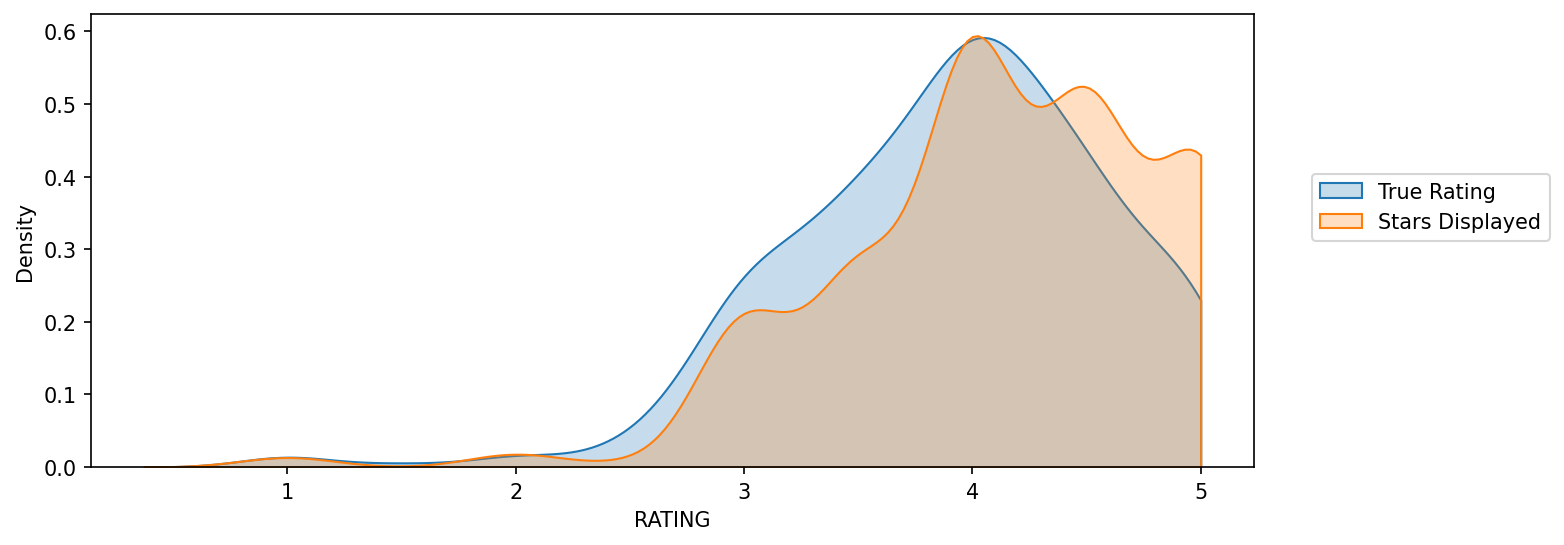

In [63]:
plt.figure(figsize=(10,4), dpi=150)

sns.kdeplot(data=df_no_zeros, x='RATING', shade=True, label='True Rating', clip=[0,5])
sns.kdeplot(data=df_no_zeros, x='STARS', shade=True, label='Stars Displayed', clip=[0,5])

plt.legend(loc=(1.05,0.5))
plt.show()

**Time to quantify this discrepancy. Start by creating a new column of the different between STARS displayed versus true RATING. This difference will be calculated as STARS-RATING and rounding these differences to the nearest decimal point.**

In [64]:
df_no_zeros['STARS_DIFF'] = round(df_no_zeros['STARS'] - df_no_zeros['RATING'], 1)
df_no_zeros

<ipython-input-64-c5b2fa41169f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_zeros['STARS_DIFF'] = round(df_no_zeros['STARS'] - df_no_zeros['RATING'], 1)


FILM  STARS  RATING  VOTES  YEAR  STARS_DIFF
0    Fifty Shades of Grey (2015)    4.0     3.9  34846  2015         0.1
1          Jurassic World (2015)    4.5     4.5  34390  2015         0.0
2         American Sniper (2015)    5.0     4.8  34085  2015         0.2
3               Furious 7 (2015)    5.0     4.8  33538  2015         0.2
4              Inside Out (2015)    4.5     4.5  15749  2015         0.0
..                           ...    ...     ...    ...   ...         ...
430       That Sugar Film (2015)    5.0     5.0      1  2015         0.0
431            The Intern (2015)    5.0     5.0      1  2015         0.0
432        The Park Bench (2015)    5.0     5.0      1  2015         0.0
433         The Wanted 18 (2015)    5.0     5.0      1  2015         0.0
434       Z For Zachariah (2015)    5.0     5.0      1  2015         0.0

[435 rows x 6 columns]

**Here is a count plot to display the number of times a certain difference occurs:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

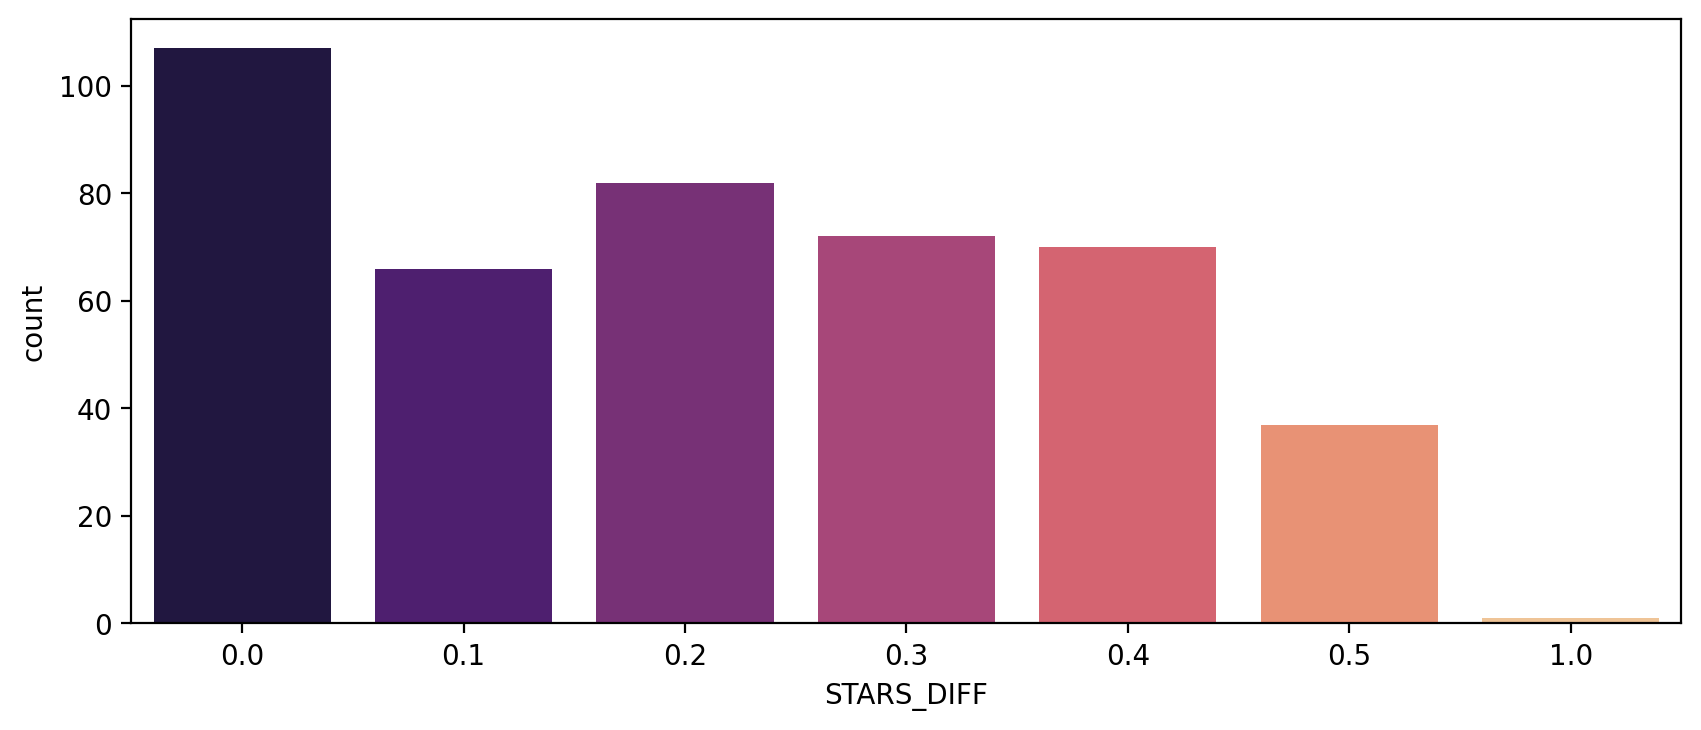

In [65]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df_no_zeros, x='STARS_DIFF', palette='magma')

**Only one movie was displaying over a 1 star difference than its true rating! Here is that movie.**

In [66]:
df_no_zeros[df_no_zeros['STARS_DIFF'] == 1.0]

FILM  STARS  RATING  VOTES  YEAR  STARS_DIFF
381  Turbo Kid (2015)    5.0     4.0      2  2015         1.0

## Comparing the scores from Fandango to other movies sites and see how they compare.

In [67]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [68]:
all_sites.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
0          66              7.1   7.8                        1330   
1          67              7.5   7.1                         249   
2          64              8.1   7.8                         627   
3          22              4.7   5.4                          31   
4          29              3.4   5.1                          88   

   IMDB_user_vote_count  
0                271107  
1                 65709  
2                103660  
3                  3136  
4                 19560

In [69]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [70]:
all_sites.describe()

RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  \
count      146.000000           146.000000  146.000000       146.000000   
mean        60.849315            63.876712   58.808219         6.519178   
std         30.168799            20.024430   19.517389         1.510712   
min          5.000000            20.000000   13.000000         2.400000   
25%         31.250000            50.000000   43.500000         5.700000   
50%         63.500000            66.500000   59.000000         6.850000   
75%         89.000000            81.000000   75.000000         7.500000   
max        100.000000            94.000000   94.000000         9.600000   

             IMDB  Metacritic_user_vote_count  IMDB_user_vote_count  
count  146.000000                  146.000000            146.000000  
mean     6.736986                  185.705479          42846.205479  
std      0.958736                  316.606515          67406.509171  
min      4.000000                    4.000000            243.000000  
25%      6.300000                   33.250000           5627.000000  
50%      6.900000                   72.500000          19103.000000  
75%      7.400000                  168.500000          45185.750000  
max      8.600000                 2375.000000         334164.000000

### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Below is a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

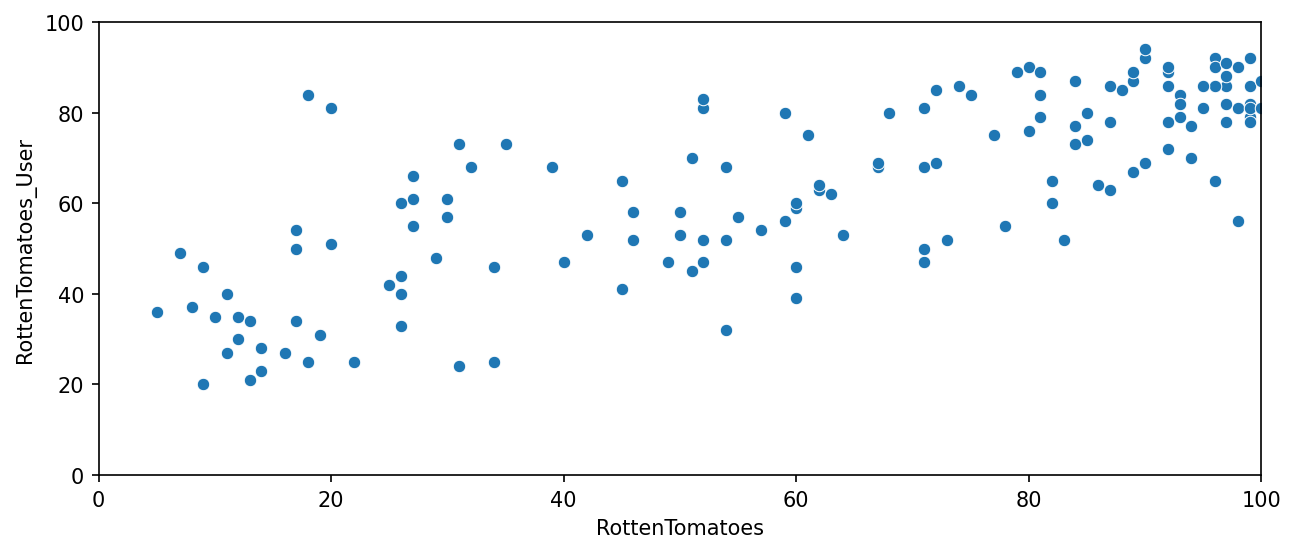

In [71]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

plt.show()

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**We will create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [72]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
0          66              7.1   7.8                        1330   
1          67              7.5   7.1                         249   
2          64              8.1   7.8                         627   
3          22              4.7   5.4                          31   
4          29              3.4   5.1                          88   

   IMDB_user_vote_count  Rotten_Diff  
0                271107          -12  
1                 65709            5  
2                103660          -10  
3                  3136          -66  
4                 19560          -14

Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**Calculating the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [73]:
abs_diff = abs(all_sites['Rotten_Diff']).mean()
abs_diff

15.095890410958905

**Plotting the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot.**

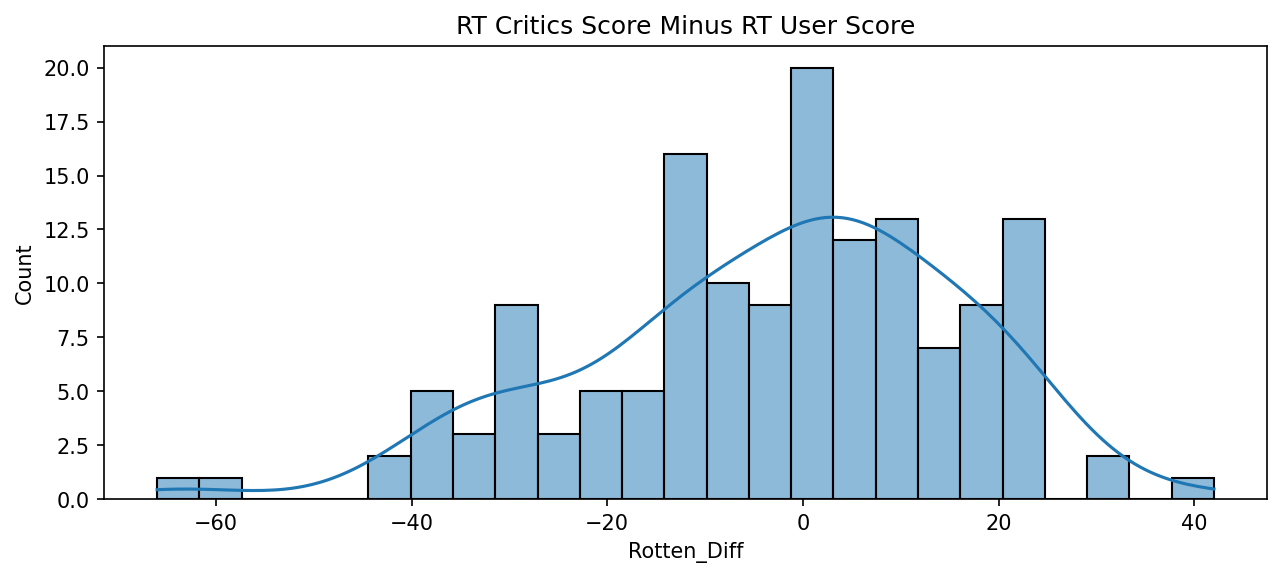

In [74]:
plt.figure(figsize=(10,4), dpi=150)

sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)

plt.title('RT Critics Score Minus RT User Score')
plt.show()

**Now here is a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

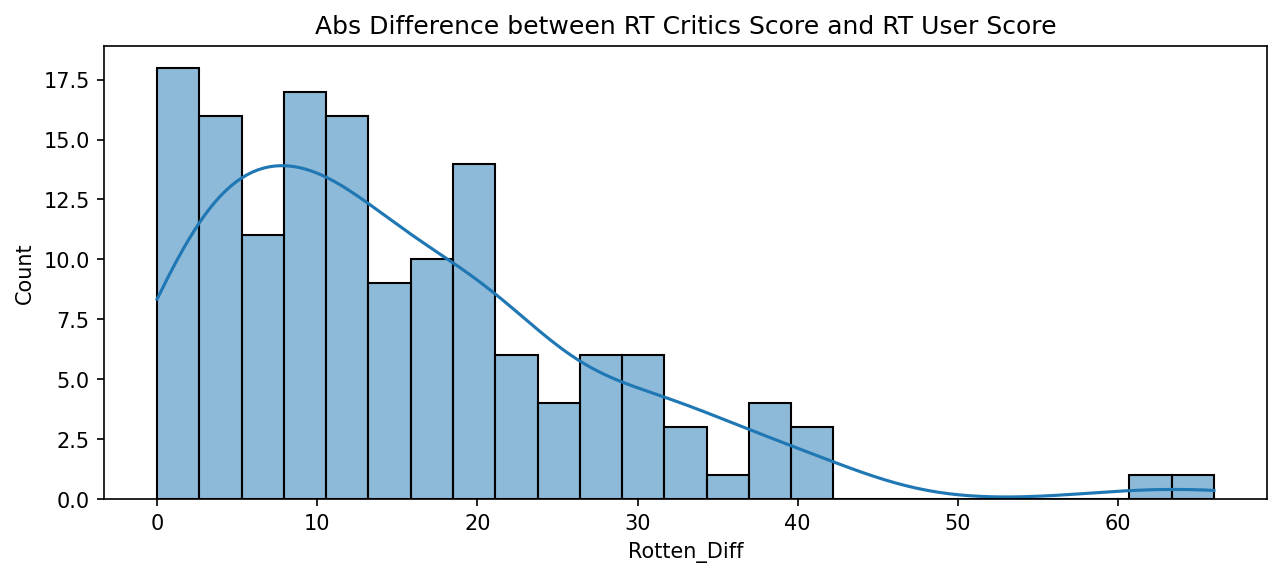

In [75]:
plt.figure(figsize=(10,4), dpi=150)

sns.histplot(x=abs(all_sites['Rotten_Diff']), kde=True, bins=25)

plt.title('Abs Difference between RT Critics Score and RT User Score')
plt.show()

**Let's find out which movies are causing the largest differences.**

**Here are the top 5 movies users rated higher than critics on average:**

In [76]:
# Looking for lowest negative values since they indicate that users of RT liked a certain movie more than critics.
print('Users love but critics hate:')
all_sites.nsmallest(5,columns='Rotten_Diff')[['FILM', 'Rotten_Diff']]

Users love but critics hate:


FILM  Rotten_Diff
3       Do You Believe? (2015)          -66
85           Little Boy (2015)          -61
105    Hitman: Agent 47 (2015)          -42
134    The Longest Ride (2015)          -42
125  The Wedding Ringer (2015)          -39

**Here are the top 5 movies critics rated higher than users on average:**

In [77]:
# Looking for largest positive values since they indicate that critics  liked a certain movie more than users of RT.
print('Critics love but users hate:')
all_sites.nlargest(5,columns='Rotten_Diff')[['FILM', 'Rotten_Diff']]

Critics love but users hate:


FILM  Rotten_Diff
69                  Mr. Turner (2014)           42
112                 It Follows (2015)           31
115          While We're Young (2015)           31
37               Welcome to Me (2015)           24
40   I'll See You In My Dreams (2015)           24

## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**Below is a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

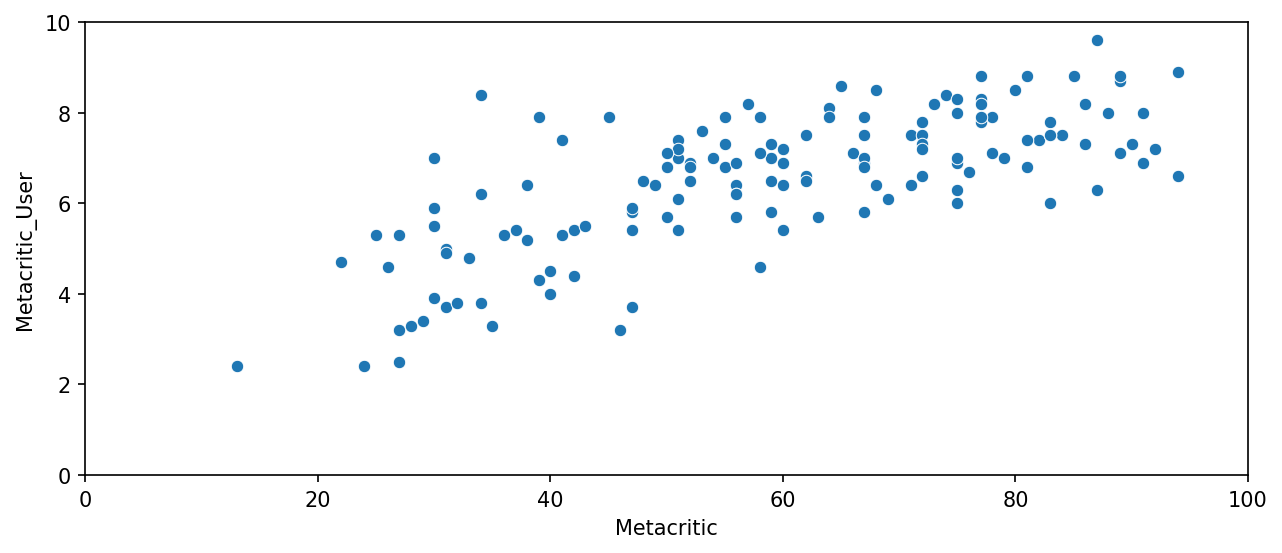

In [78]:
plt.figure(figsize=(10,4), dpi=150)

sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')

plt.xlim(0,100)
plt.ylim(0,10)
plt.show()

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Below is a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB for a specific movie.**

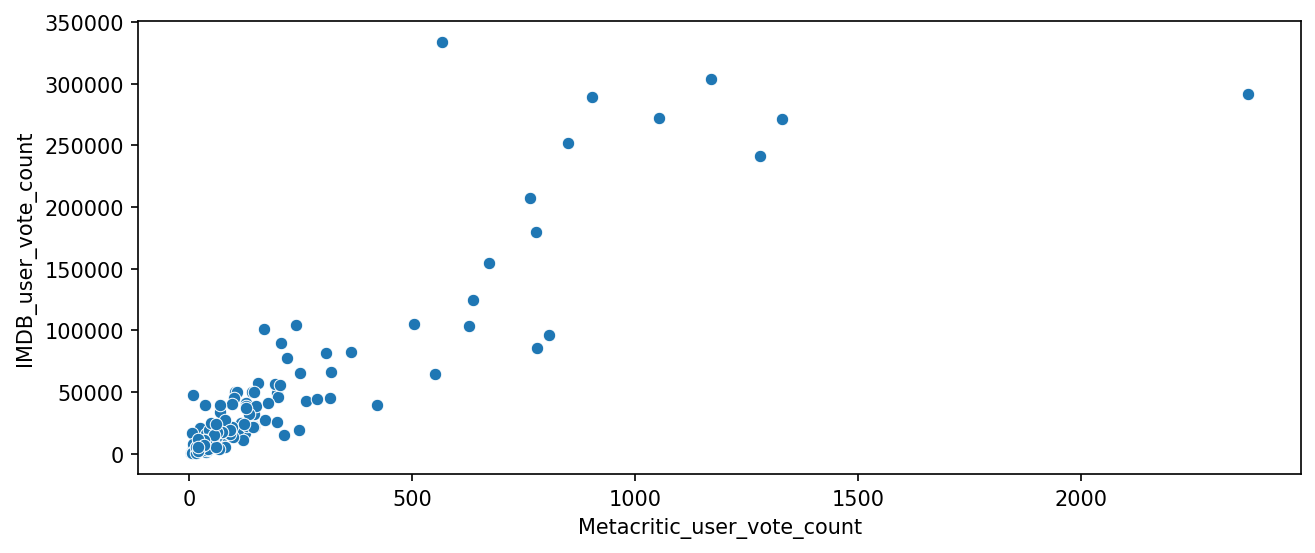

In [79]:
plt.figure(figsize=(10,4), dpi=150)

sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

plt.show()

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. Here is that movie?**

In [80]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

FILM  RottenTomatoes  RottenTomatoes_User  \
14  The Imitation Game (2014)              90                   92   

    Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
14          73              8.2   8.1                         566   

    IMDB_user_vote_count  Rotten_Diff  
14                334164           -2

**Here is the movie that has the highest Metacritic User Vote count?**

In [81]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

FILM  RottenTomatoes  RottenTomatoes_User  \
88  Mad Max: Fury Road (2015)              97                   88   

    Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
88          89              8.7   8.3                        2375   

    IMDB_user_vote_count  Rotten_Diff  
88                292023            9

## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**First we'll combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so we need to do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [82]:
df = pd.merge(fandango, all_sites, how='inner', on='FILM')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [84]:
df.head()

FILM  STARS  RATING  VOTES  YEAR  RottenTomatoes  \
0  Fifty Shades of Grey (2015)    4.0     3.9  34846  2015              25   
1        Jurassic World (2015)    4.5     4.5  34390  2015              71   
2       American Sniper (2015)    5.0     4.8  34085  2015              72   
3             Furious 7 (2015)    5.0     4.8  33538  2015              81   
4            Inside Out (2015)    4.5     4.5  15749  2015              98   

   RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0                   42          46              3.2   4.2   
1                   81          59              7.0   7.3   
2                   85          72              6.6   7.4   
3                   84          67              6.8   7.4   
4                   90          94              8.9   8.6   

   Metacritic_user_vote_count  IMDB_user_vote_count  Rotten_Diff  
0                         778                179506          -17  
1                        1281                241807          -10  
2                         850                251856          -13  
3                         764                207211           -3  
4                         807                 96252            8

### Normalizing columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

In [85]:
def normalize_rating(column, normalizer):
    return np.round(df[column] / normalizer, 1)

df['RT_Norm'] = normalize_rating('RottenTomatoes', 20)
df['RTU_Norm'] = normalize_rating('RottenTomatoes_User', 20)
df['Meta_Norm'] = normalize_rating('Metacritic', 20)
df['Meta_U_Norm'] = normalize_rating('Metacritic_User', 2)
df['IMDB_Norm'] = normalize_rating('IMDB', 2)
df.head()

FILM  STARS  RATING  VOTES  YEAR  RottenTomatoes  \
0  Fifty Shades of Grey (2015)    4.0     3.9  34846  2015              25   
1        Jurassic World (2015)    4.5     4.5  34390  2015              71   
2       American Sniper (2015)    5.0     4.8  34085  2015              72   
3             Furious 7 (2015)    5.0     4.8  33538  2015              81   
4            Inside Out (2015)    4.5     4.5  15749  2015              98   

   RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0                   42          46              3.2   4.2   
1                   81          59              7.0   7.3   
2                   85          72              6.6   7.4   
3                   84          67              6.8   7.4   
4                   90          94              8.9   8.6   

   Metacritic_user_vote_count  IMDB_user_vote_count  Rotten_Diff  RT_Norm  \
0                         778                179506          -17      1.2   
1                        1281                241807          -10      3.6   
2                         850                251856          -13      3.6   
3                         764                207211           -3      4.0   
4                         807                 96252            8      4.9   

   RTU_Norm  Meta_Norm  Meta_U_Norm  IMDB_Norm  
0       2.1        2.3          1.6        2.1  
1       4.0        3.0          3.5        3.6  
2       4.2        3.6          3.3        3.7  
3       4.2        3.4          3.4        3.7  
4       4.5        4.7          4.4        4.3

**Now we'll create a norm_scores DataFrame that only contains the normalizes ratings. It will include both STARS and RATING from the original Fandango table.**

In [86]:
norm_scores = df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]
norm_scores.head()

STARS  RATING  RT_Norm  RTU_Norm  Meta_Norm  Meta_U_Norm  IMDB_Norm
0    4.0     3.9      1.2       2.1        2.3          1.6        2.1
1    4.5     4.5      3.6       4.0        3.0          3.5        3.6
2    5.0     4.8      3.6       4.2        3.6          3.3        3.7
3    5.0     4.8      4.0       4.2        3.4          3.4        3.7
4    4.5     4.5      4.9       4.5        4.7          4.4        4.3

### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**Below is a plot comparing the distributions of normalized ratings across all sites.**

In [87]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

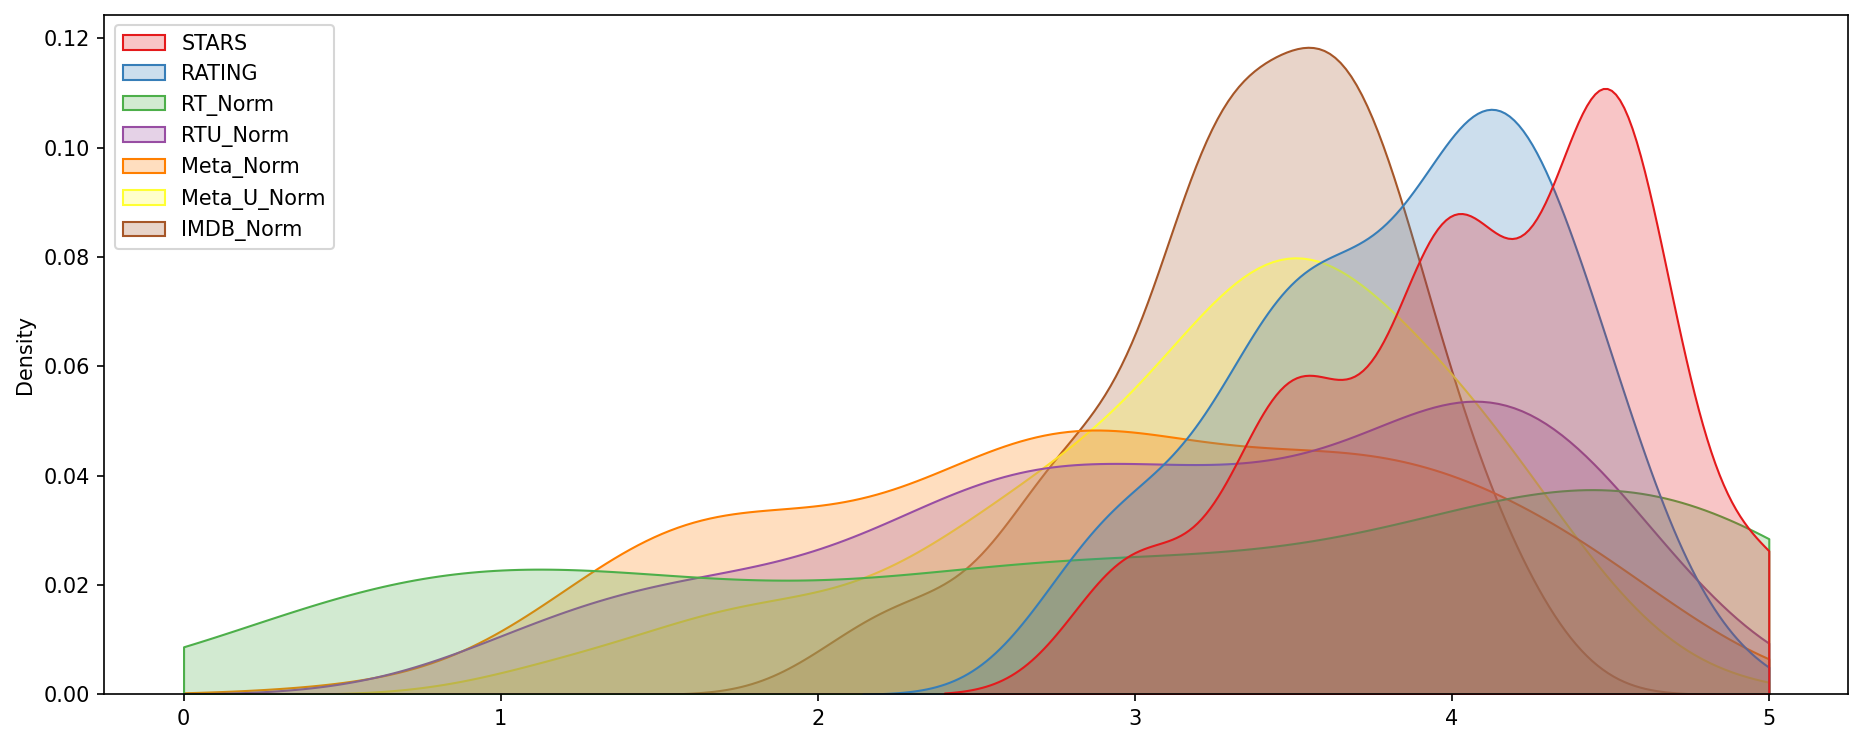

In [88]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_scores, clip=[0,5], shade=True, label='STARS', palette='Set1', ax=ax)
move_legend(ax, 'upper left')
plt.show()

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**Below is a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

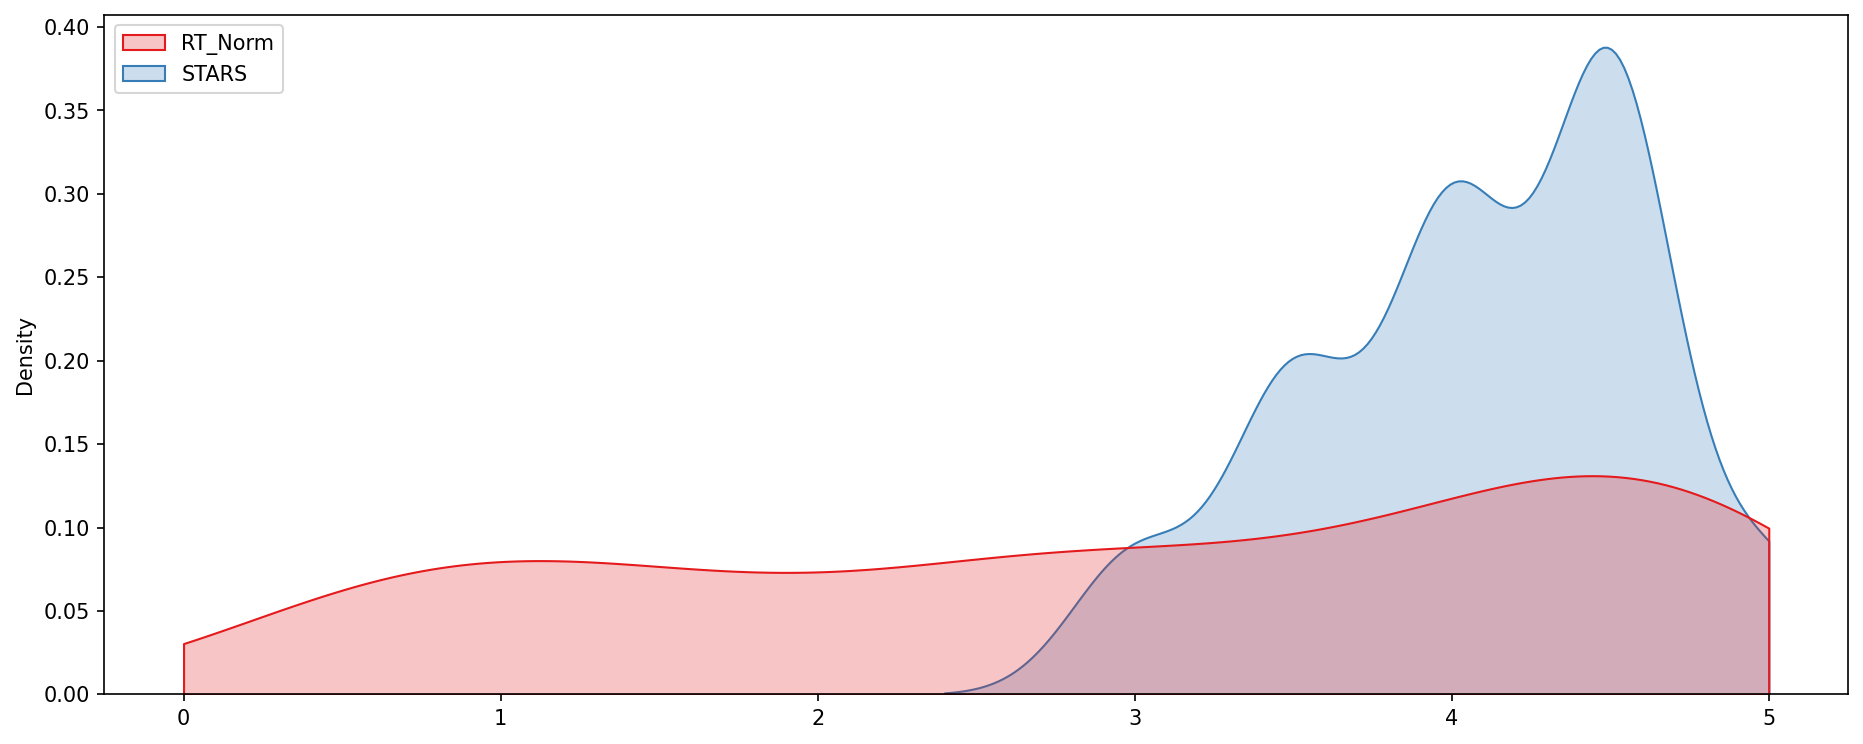

In [89]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)

sns.kdeplot(data=norm_scores[['RT_Norm', 'STARS']], clip=[0,5], shade=True, palette='Set1', ax=ax)

move_legend(ax, 'upper left')
plt.show()

**histplot comparing all normalized scores.**

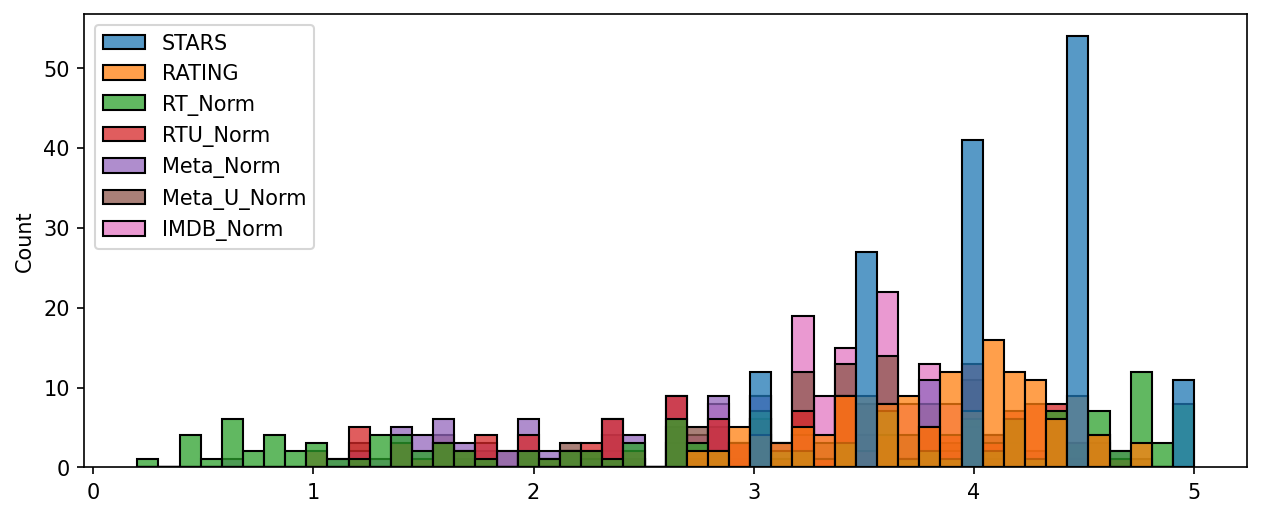

In [90]:
plt.subplots(figsize=(10,4), dpi=150)

sns.histplot(data=norm_scores, bins=50)

#move_legend(ax, 'upper left')
plt.show()


### How are the worst movies rated across all platforms?

**We'll use a clustermap to visualize all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies**

   STARS  RATING  RT_Norm  RTU_Norm  Meta_Norm  Meta_U_Norm  IMDB_Norm
0    4.0     3.9      1.2       2.1        2.3          1.6        2.1
1    4.5     4.5      3.6       4.0        3.0          3.5        3.6
2    5.0     4.8      3.6       4.2        3.6          3.3        3.7
3    5.0     4.8      4.0       4.2        3.4          3.4        3.7
4    4.5     4.5      4.9       4.5        4.7          4.4        4.3


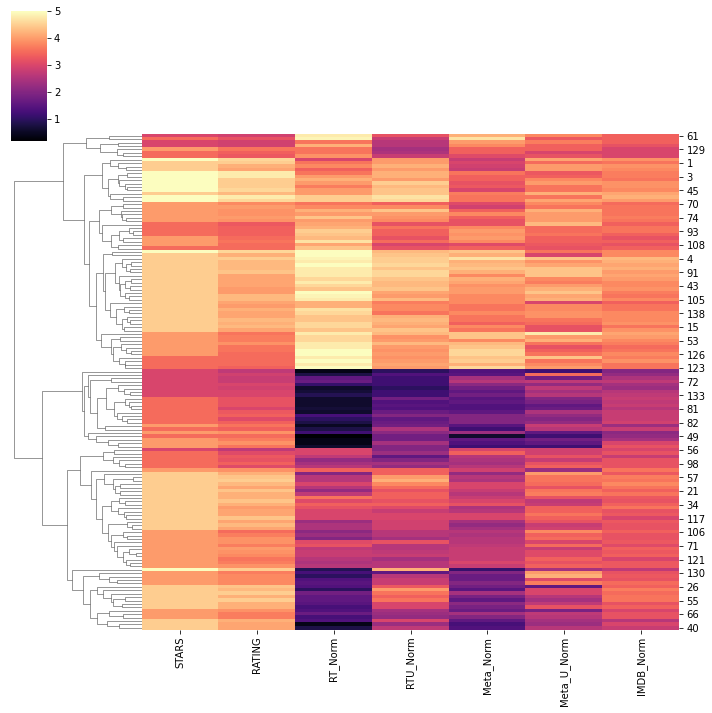

In [91]:
# CODE HERE
print(norm_scores.head())
sns.clustermap(data=norm_scores, cmap='magma', col_cluster=False)

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?**

In [92]:
norm_scores = df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm', 'FILM']]
norm_scores.head()

STARS  RATING  RT_Norm  RTU_Norm  Meta_Norm  Meta_U_Norm  IMDB_Norm  \
0    4.0     3.9      1.2       2.1        2.3          1.6        2.1   
1    4.5     4.5      3.6       4.0        3.0          3.5        3.6   
2    5.0     4.8      3.6       4.2        3.6          3.3        3.7   
3    5.0     4.8      4.0       4.2        3.4          3.4        3.7   
4    4.5     4.5      4.9       4.5        4.7          4.4        4.3   

                          FILM  
0  Fifty Shades of Grey (2015)  
1        Jurassic World (2015)  
2       American Sniper (2015)  
3             Furious 7 (2015)  
4            Inside Out (2015)

In [93]:
ten_smallest_RT_scores = norm_scores.nsmallest(10, 'RT_Norm')
ten_smallest_RT_scores

STARS  RATING  RT_Norm  RTU_Norm  Meta_Norm  Meta_U_Norm  IMDB_Norm  \
49    3.5     3.5      0.2       1.8        0.6          1.2        2.2   
25    4.5     4.1      0.4       2.3        1.3          2.3        3.0   
28    3.0     2.7      0.4       1.0        1.4          1.2        2.0   
54    4.0     3.7      0.4       1.8        1.6          1.8        2.4   
84    4.0     3.9      0.4       2.4        1.4          1.6        3.0   
50    4.0     3.6      0.5       1.8        1.5          2.8        2.3   
77    3.5     3.2      0.6       1.8        1.5          2.0        2.8   
78    3.5     3.2      0.6       1.5        1.4          1.6        2.8   
83    3.5     3.3      0.6       1.7        1.6          2.5        2.8   
87    3.5     3.2      0.6       1.4        1.6          1.9        2.7   

                             FILM  
49  Paul Blart: Mall Cop 2 (2015)  
25                 Taken 3 (2015)  
28          Fantastic Four (2015)  
54             Hot Pursuit (2015)  
84        Hitman: Agent 47 (2015)  
50       The Boy Next Door (2015)  
77             Seventh Son (2015)  
78               Mortdecai (2015)  
83              Sinister 2 (2015)  
87     Unfinished Business (2015)

**Visualizing the distribution of ratings across all sites for the top 10 worst movies.**

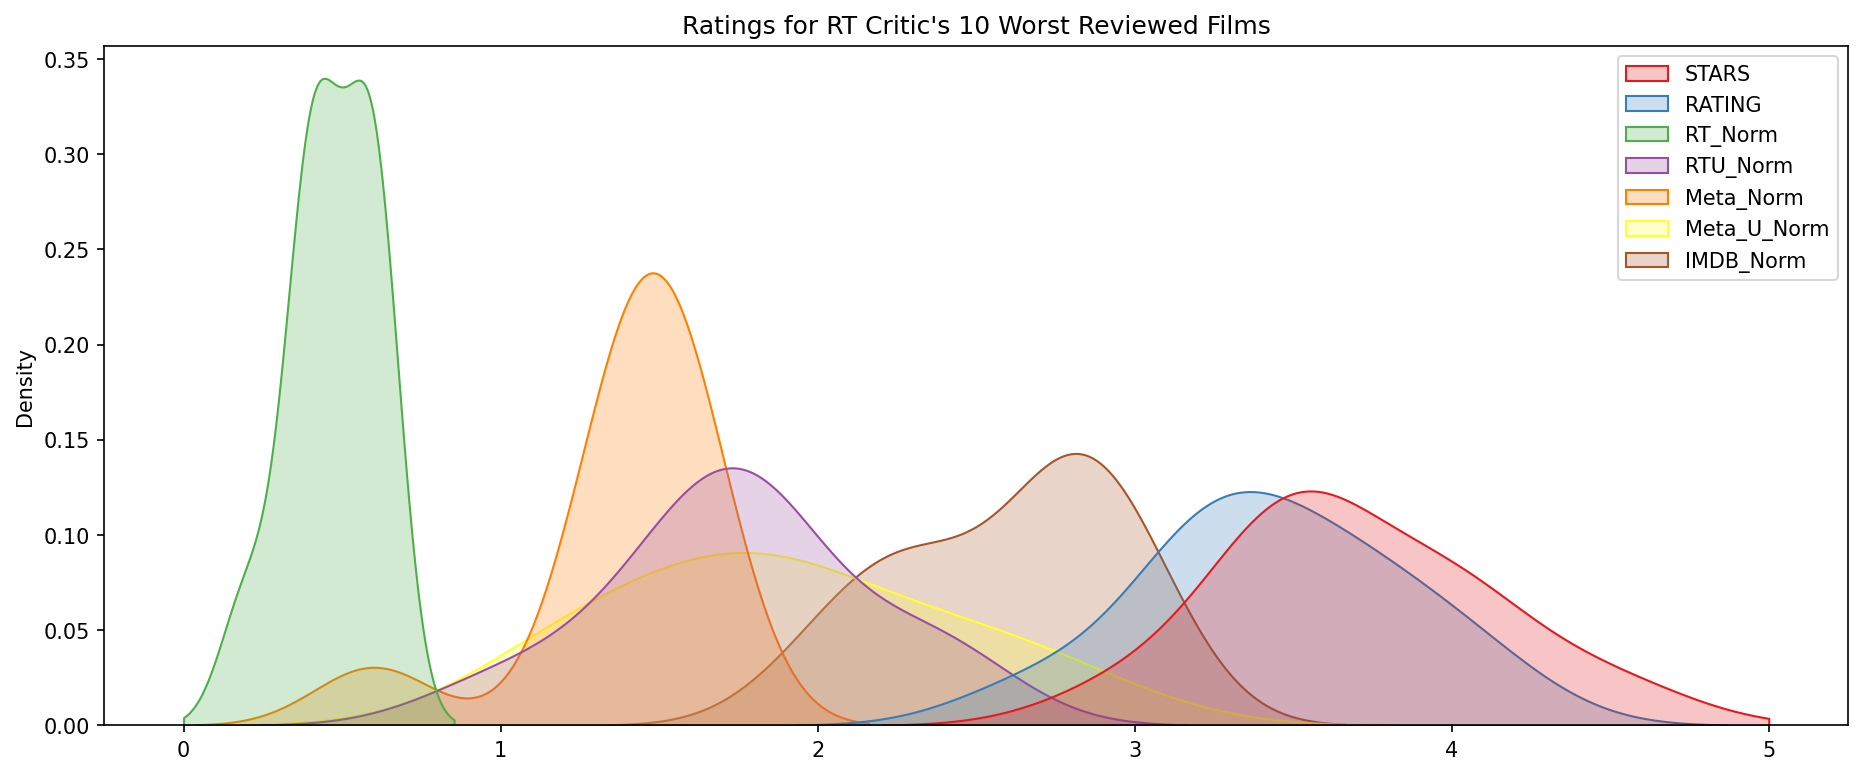

In [94]:
# CODE HERE
fig, ax = plt.subplots(figsize=(15,6), dpi=150)

sns.kdeplot(data=ten_smallest_RT_scores, clip=[0,5], shade=True, palette='Set1', ax=ax)

move_legend(ax, 'upper right')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")
plt.show()

**Even when dealing with the worst rated movies from RT, we can see that Fandango shows much higher ratings on their platform, further requiring us to question the legitimacy of their business.**